# cenus income project

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [184]:
#reading dataframe
df = pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [114]:
df.shape

(32560, 15)

# EDA

In [115]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [116]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we have two types of datai.e object and integer type.
Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country are all categorical in nature, as is the case with the target variable Income.
While Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are continuous in nature.


In [117]:
#checking null values in each column
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

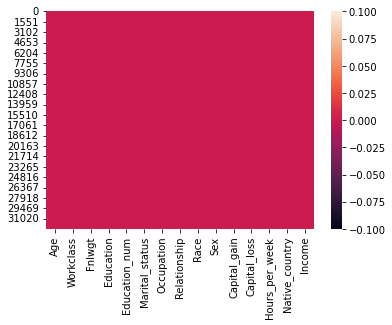

In [118]:
#checking null values in each column use heatmap(visualization)
sns.heatmap(df.isnull())

# we can see that there is no any null value in given dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


observation-:

# dataset description 

In [120]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

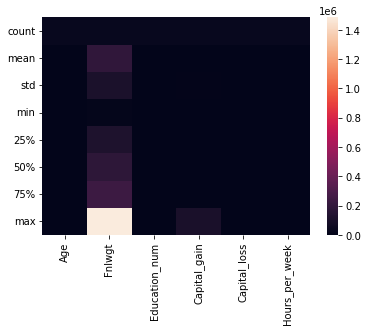

In [121]:
sns.heatmap(df.describe())

from the description of dataset we can clearly see that there is no any null value.the count of every data columns is 32560.
2.there is possibilty of skewness.

# checking corrrelation

In [122]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


1.the age feature is an diagnol.

<AxesSubplot:>

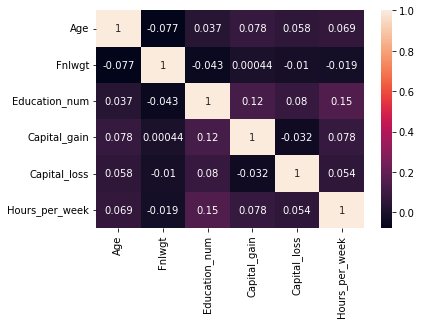

In [123]:
sns.heatmap(df.corr(),annot = True)

we can see that some of the columns are possitivily corealted and some are negativilty corelated with each other.

In [125]:
#dealing with datatypes
#encoding
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [126]:
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# #univariate analysis

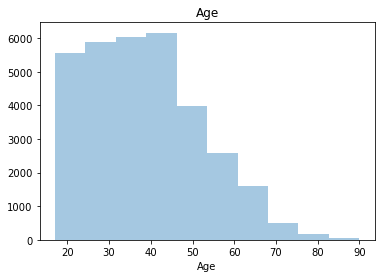

In [40]:

    plt.figure()
    sns.distplot(df["Age"], bins = 10, kde= False)
    plt.title("Age")
    plt.show()

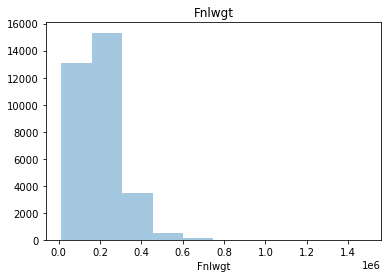

In [42]:
#Fnlwgt
plt.figure()
sns.distplot(df["Fnlwgt"], bins = 10, kde= False)
plt.title("Fnlwgt")
plt.show()

    

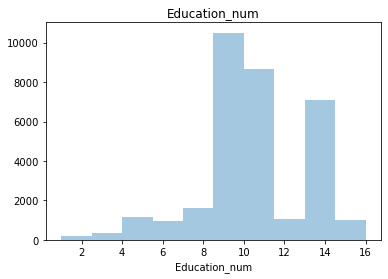

In [43]:
#Education_num
plt.figure()
sns.distplot(df["Education_num"], bins = 10, kde= False)
plt.title("Education_num")
plt.show()

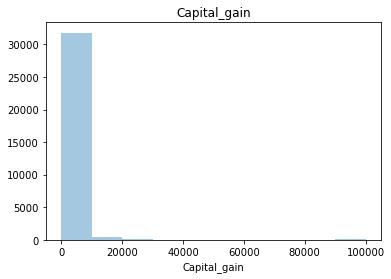

In [44]:
#Capital_gain
plt.figure()
sns.distplot(df["Capital_gain"], bins = 10, kde= False)
plt.title("Capital_gain")
plt.show()

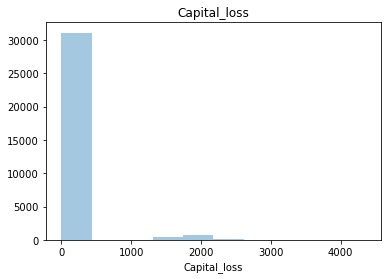

In [45]:
#Capital_loss
plt.figure()
sns.distplot(df["Capital_loss"], bins = 10, kde= False)
plt.title("Capital_loss")
plt.show()

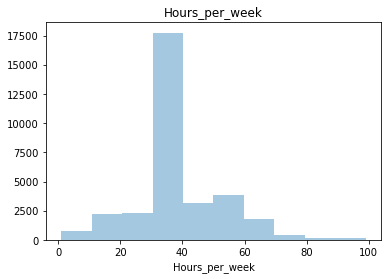

In [46]:
#Hours_per_week
plt.figure()
sns.distplot(df["Hours_per_week"], bins = 10, kde= False)
plt.title("Hours_per_week")
plt.show()

# bivariate analysis

In [47]:
cont_cols

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

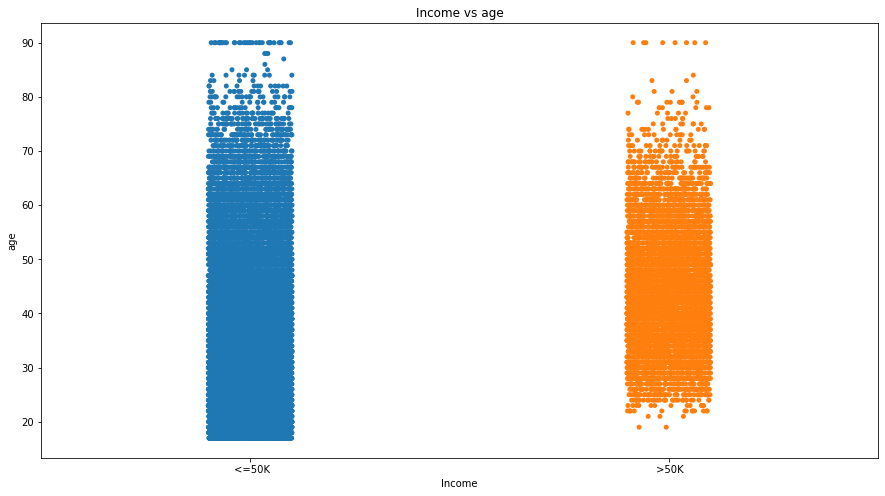

In [52]:
#age vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Age"])
ax.set(xlabel = 'Income', ylabel = "age")
plt.title('Income vs age')
plt.show()

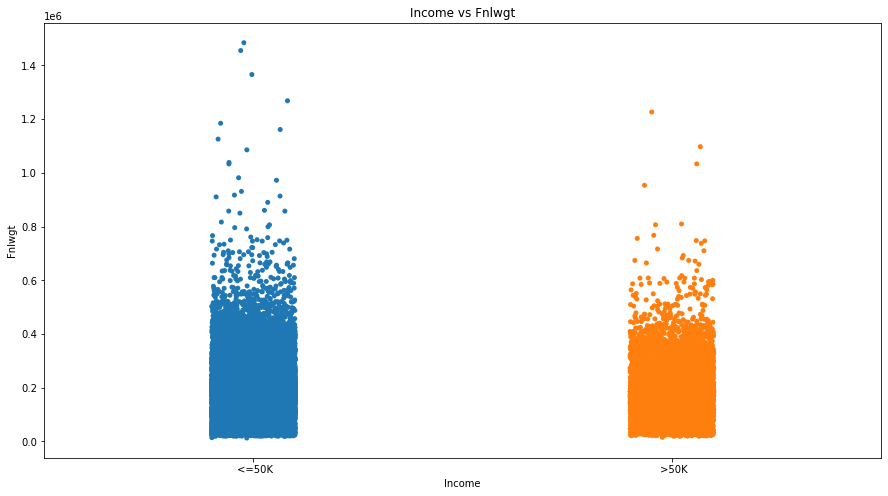

In [53]:
#Fnlwgt vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Fnlwgt"])
ax.set(xlabel = 'Income', ylabel = "Fnlwgt")
plt.title('Income vs Fnlwgt')
plt.show()

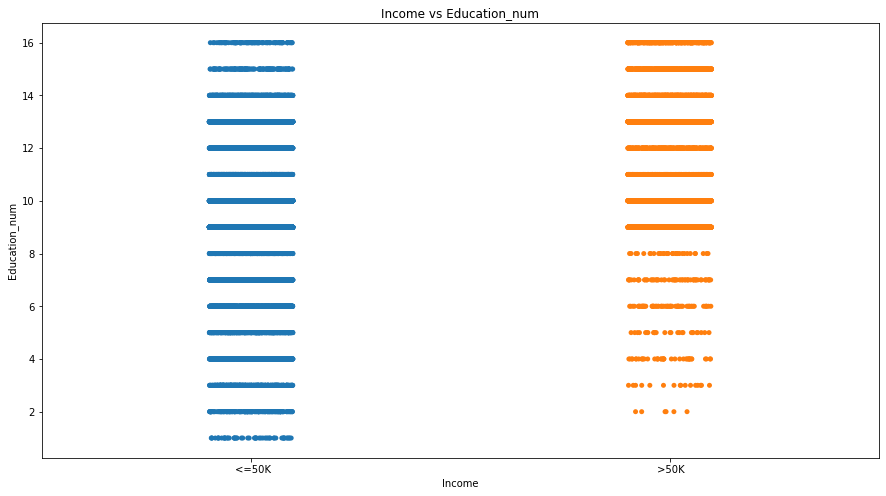

In [54]:
# Education_num' vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Education_num"])
ax.set(xlabel = 'Income', ylabel = "Education_num")
plt.title('Income vs Education_num')
plt.show()

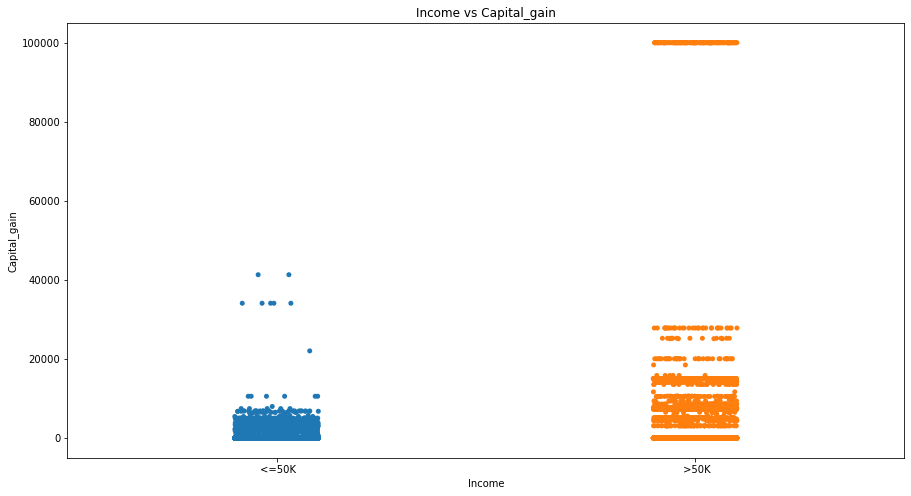

In [55]:
# Capital_gain vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Capital_gain"])
ax.set(xlabel = 'Income', ylabel = "Capital_gain")
plt.title('Income vs Capital_gain')
plt.show()

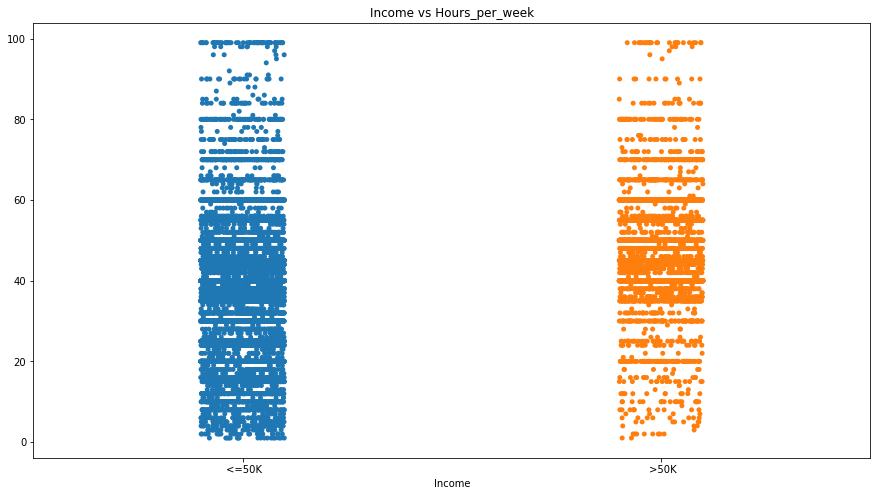

In [58]:
#Hours_per_week vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Hours_per_week"])
ax.set(xlabel = 'Income', ylabel = "")
plt.title('Income vs Hours_per_week')
plt.show()

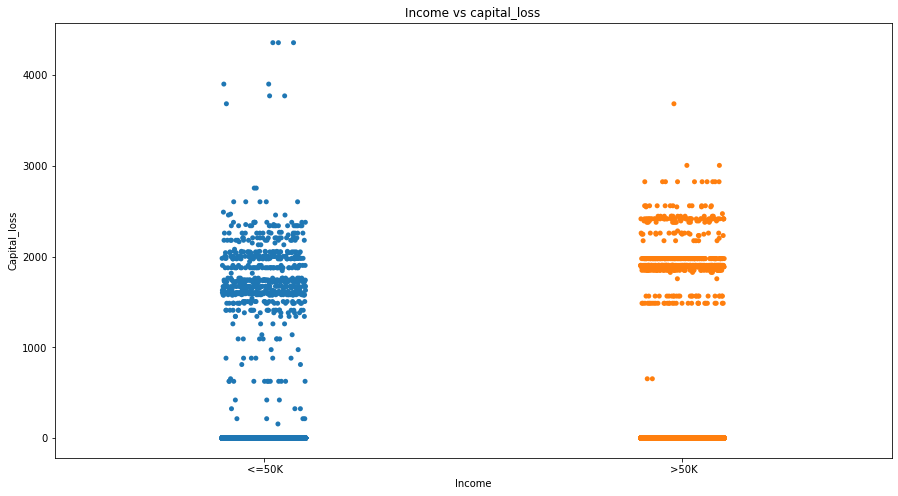

In [59]:
# Capital_loss vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Capital_loss"])
ax.set(xlabel = 'Income', ylabel = "Capital_loss")
plt.title('Income vs capital_loss')
plt.show()

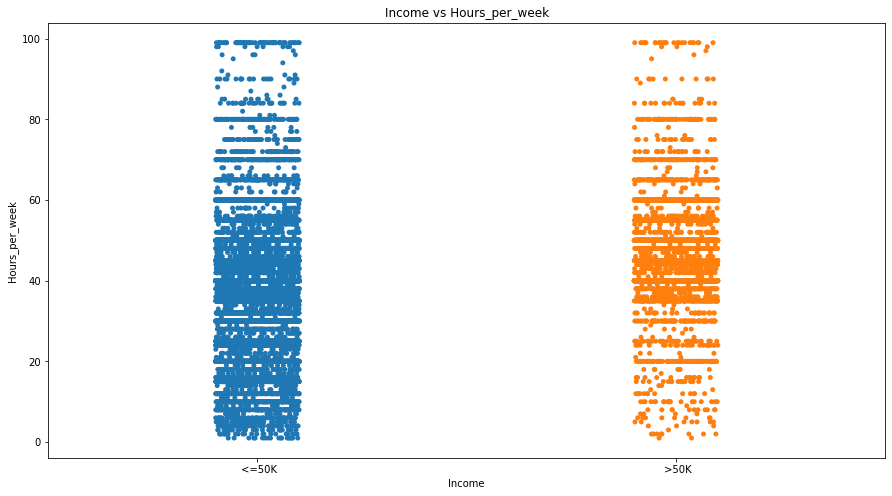

In [60]:
# Hours_per_week vs income
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Income'], df["Hours_per_week"])
ax.set(xlabel = 'Income', ylabel = "Hours_per_week")
plt.title('Income vs Hours_per_week')
plt.show()

Self Employed people are the only ones in workclass column who seems to have more 50K+ earners and less <=50k earners.

While in education column, Masters, Doctorate and Prof-School are the only ones which have more 50k+ earners and less <=50k earners.

People who are married irrespective of Relationship (Husband or Wife) seems to have higher chance of earning over 50k.

# outliers

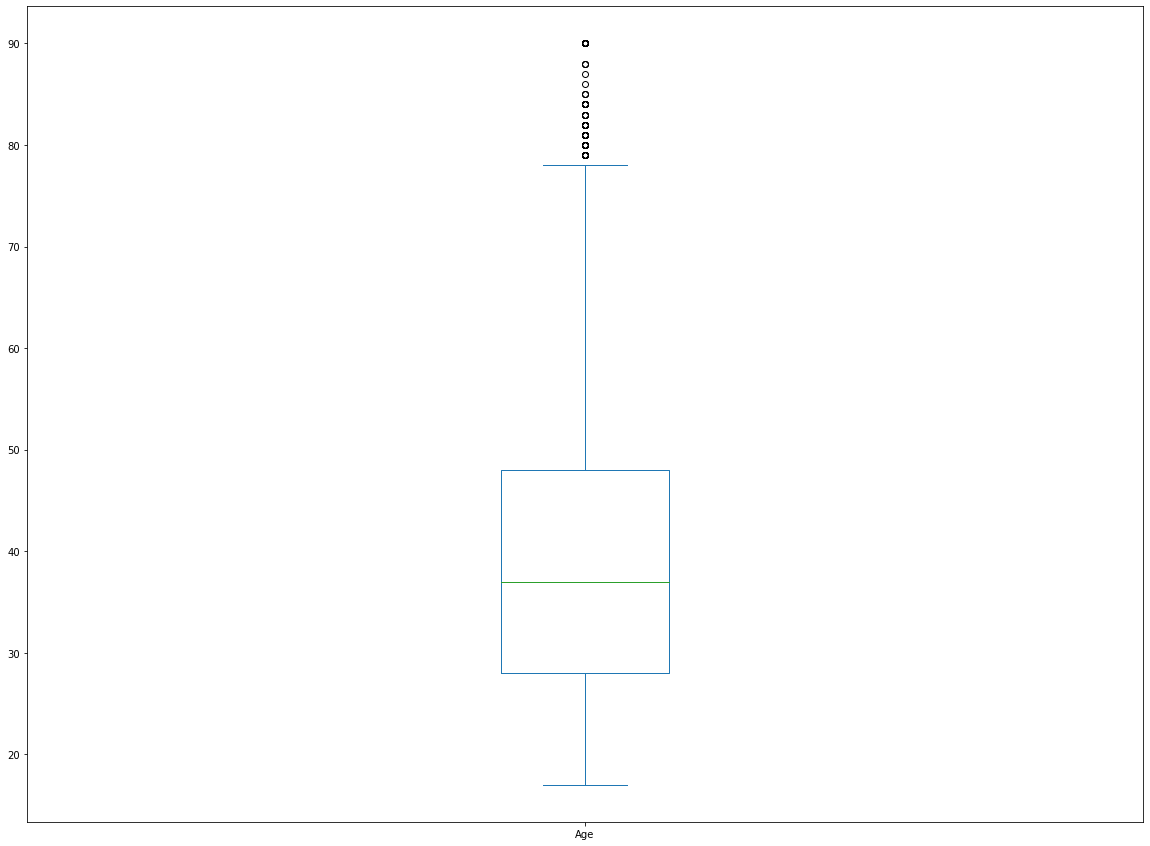

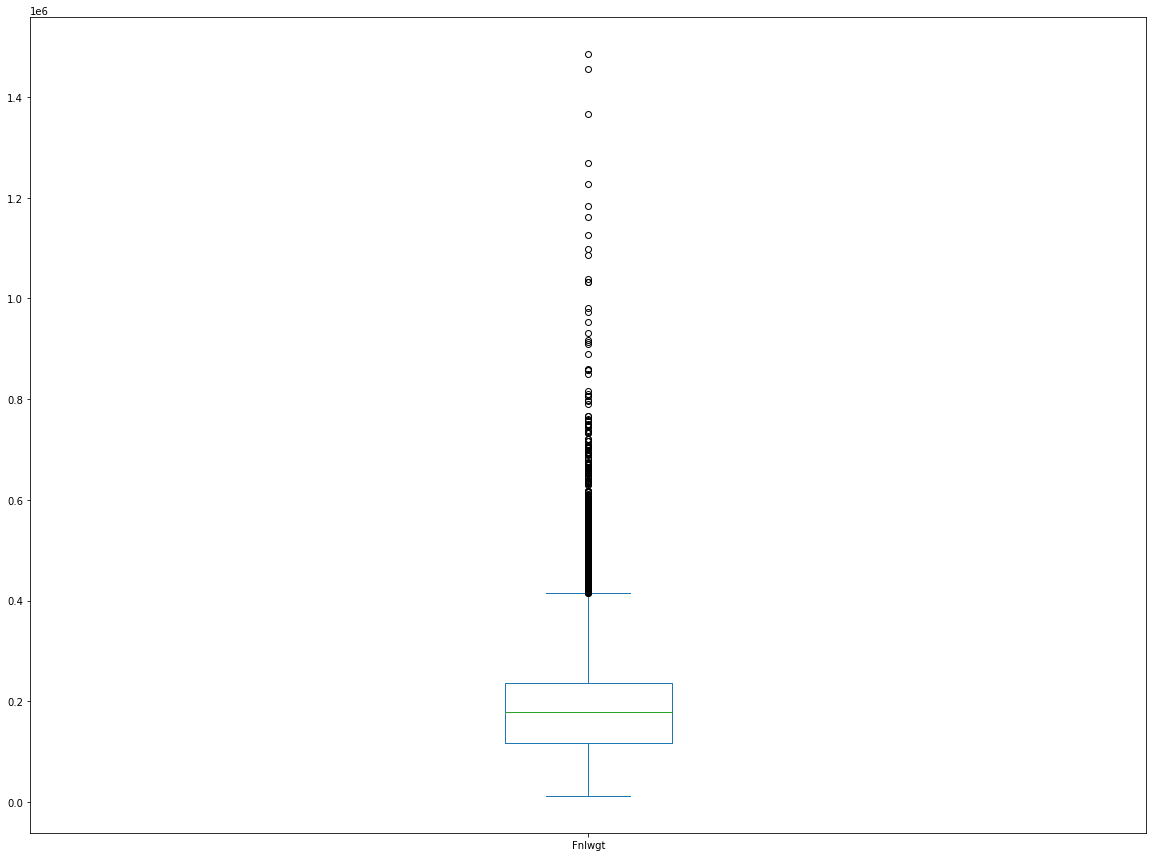

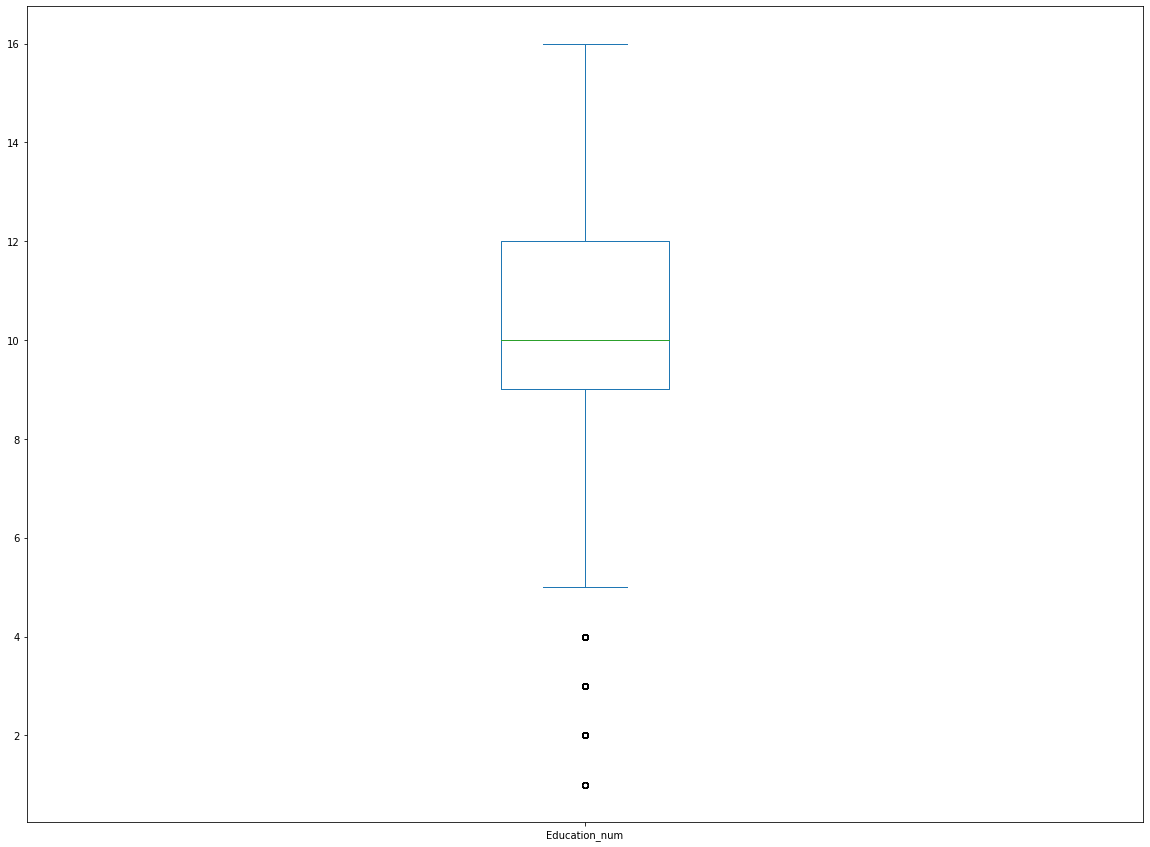

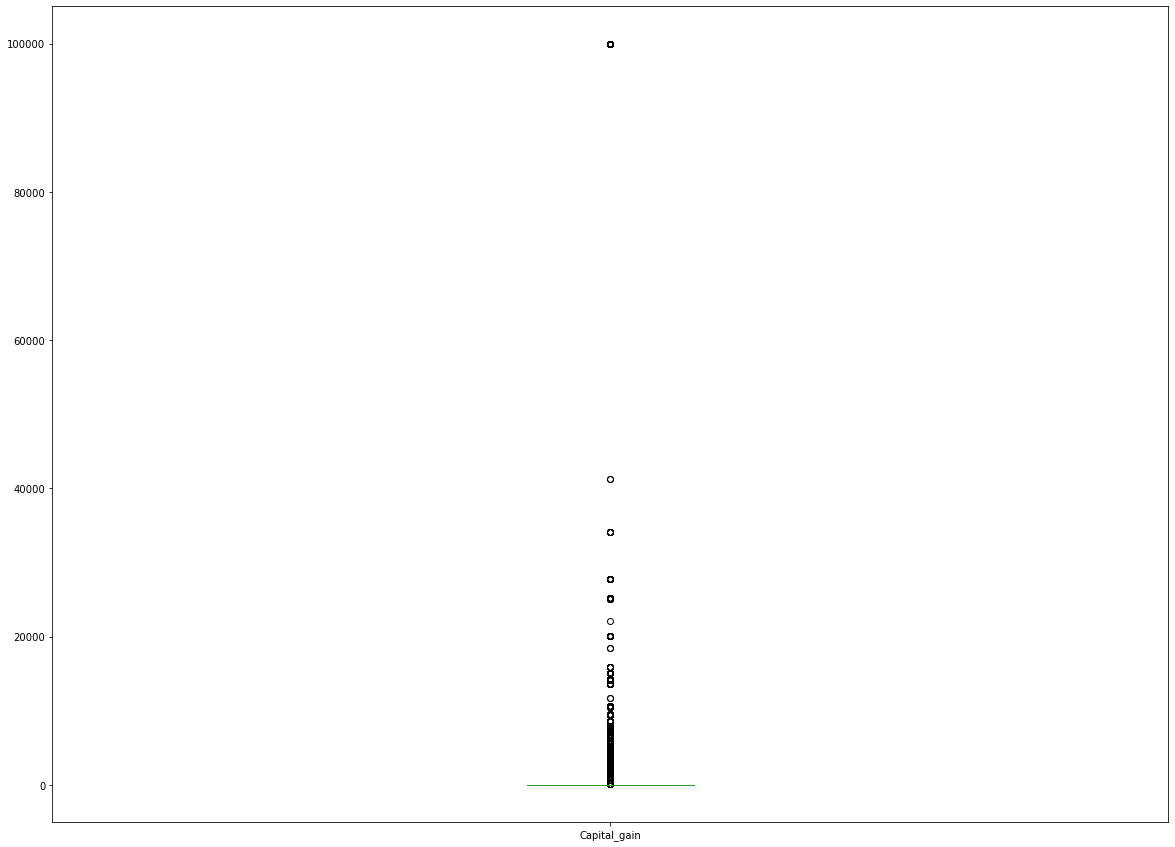

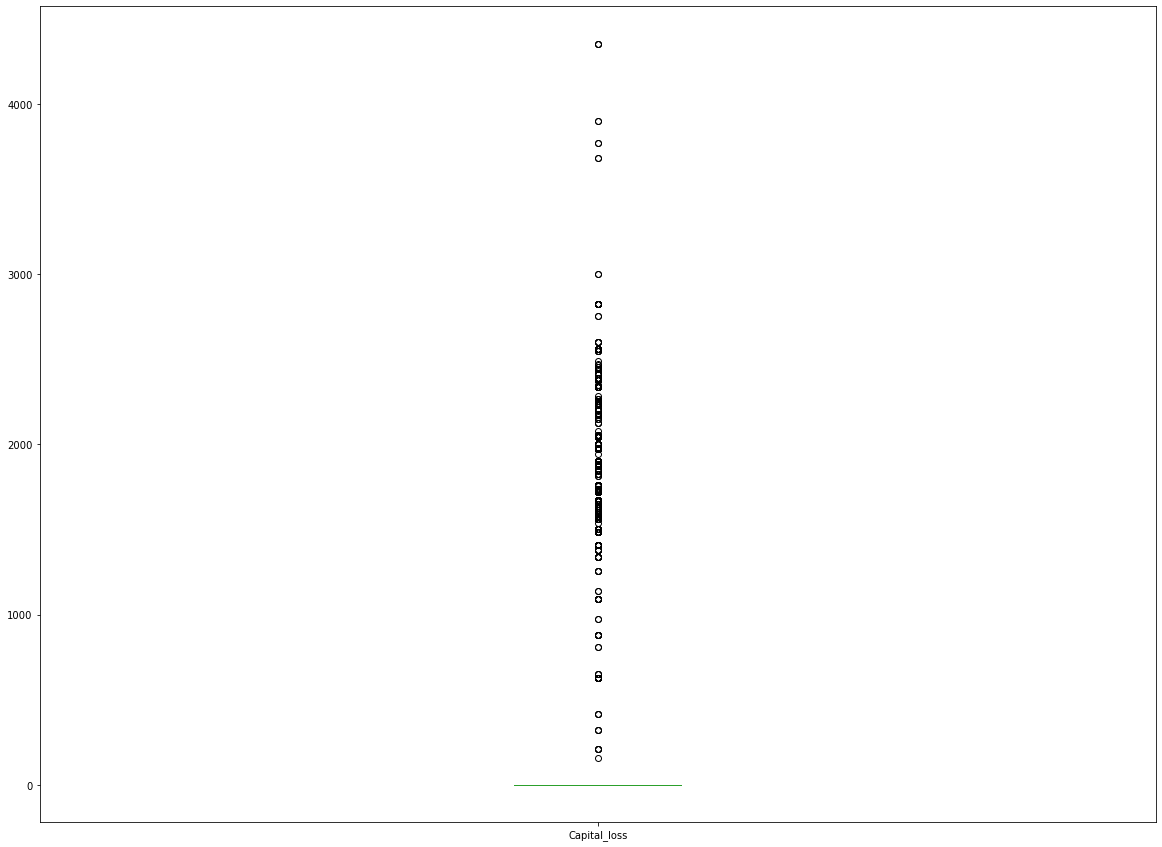

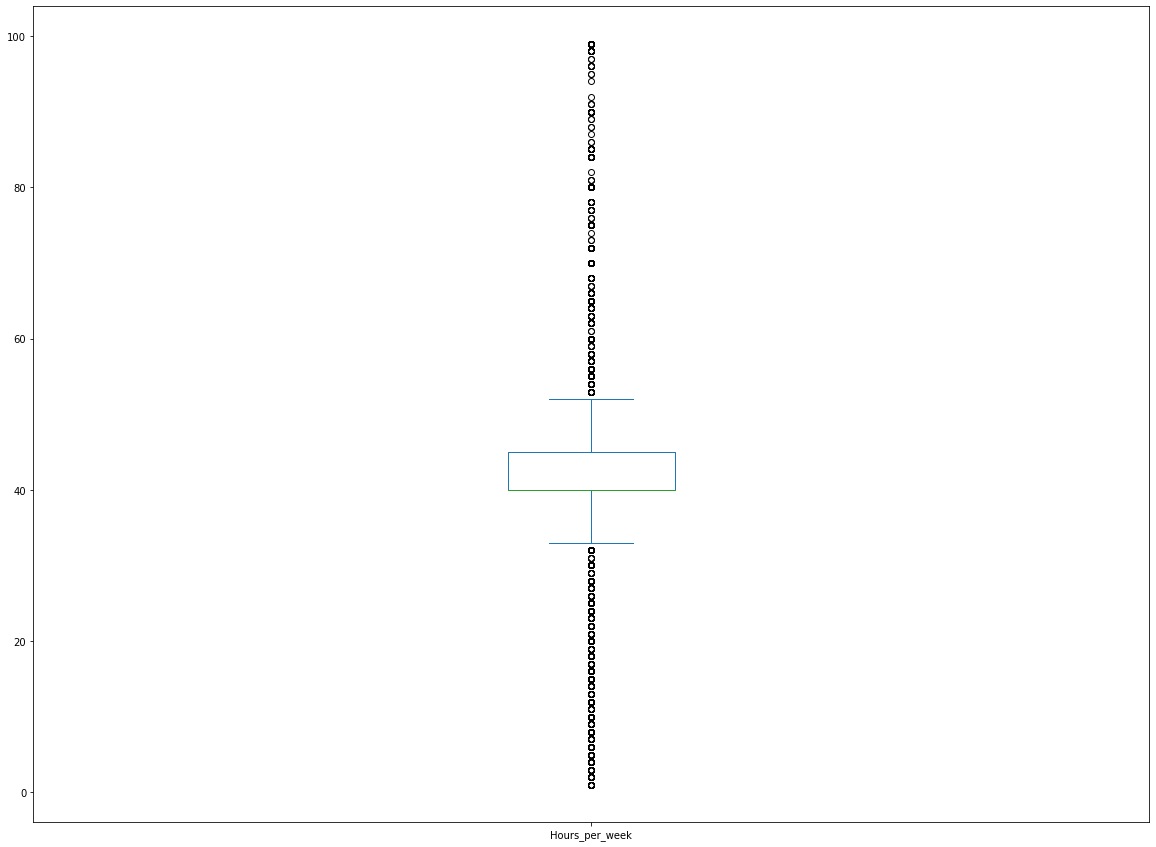

In [64]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

# skewness

In [128]:
df.skew()


Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

the skewness is also present on dataset. the fnlwgt andeducation_num and capital_loss are higly skewed.

# dealing with outliers and skewness

# droping columns

In [185]:
df_new=df

In [186]:
df_new = df_new.drop('Education', axis = 1)


In [187]:
df_new.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [188]:
df1 = df_new.drop('Fnlwgt',axis=1)
df1.columns

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [189]:
df1 = df1.drop('Workclass',axis=1)
df1.columns

Index(['Age', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
       'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week',
       'Native_country', 'Income'],
      dtype='object')

In [190]:

df1 = df1.drop('Native_country',axis=1)


df1.columns

Index(['Age', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
       'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week',
       'Income'],
      dtype='object')

In [191]:
df1 = df1.drop('Race',axis=1)


df1.columns

Index(['Age', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
       'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [198]:
#replacing imcome values with 0 and 1 for better understanding
df1['Income'].replace(' <=50K', 0, inplace = True)
df1['Income'].replace(' >50K', 1, inplace = True)

In [199]:
df1["Income"]

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

# label encoding

In [200]:
from sklearn.preprocessing import LabelEncoder

In [201]:
#variable that need encoded are [ 'Marital_status', 'Occupation', 'Relationship', 'Sex']

In [202]:
e_var=['Marital_status', 'Occupation', 'Relationship','Sex']

In [203]:
label_encoder = LabelEncoder()
for col in e_var:
    df1[col] = label_encoder.fit_transform(df1[col])

In [204]:
df1

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,13,2,4,0,1,0,0,13,0
1,38,9,0,6,1,1,0,0,40,0
2,53,7,2,6,0,1,0,0,40,0
3,28,13,2,10,5,0,0,0,40,0
4,37,14,2,4,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,0,38,0
32556,40,9,2,7,0,1,0,0,40,1
32557,58,9,6,1,4,0,0,0,40,0
32558,22,9,4,1,3,1,0,0,20,0


In [205]:
df_new.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int64
dtype: object

# spliting(features and target)

In [208]:
#spliting features and target
x = df1.drop('Income', axis = 1)
y = df1['Income']

# power transforming

In [209]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.89194656,  1.16479277, -0.38342726, ..., -0.30136989,
        -0.2212132 , -2.22151541],
       [ 0.10271741, -0.4643296 , -1.78243401, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [ 1.06438077, -1.20027437, -0.38342726, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       ...,
       [ 1.33455599, -0.4643296 ,  2.1717841 , ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [-1.35834147, -0.4643296 ,  0.91971919, ..., -0.30136989,
        -0.2212132 , -1.65499204],
       [ 1.00782289, -0.4643296 , -0.38342726, ...,  3.31823374,
        -0.2212132 , -0.03557001]])

In [210]:
df_new.skew()


Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

# best random value

In [211]:
maxAccu = 0
maxRS = 0

for i in range (1, 400):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8351760851760852 on Random State 109


# Creating Train Test Split


In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 109)

# modeling

In [213]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.8351760851760852
[[7043  463]
 [1147 1115]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7506
           1       0.71      0.49      0.58      2262

    accuracy                           0.84      9768
   macro avg       0.78      0.72      0.74      9768
weighted avg       0.82      0.84      0.82      9768

GaussianNB()
0.8195126945126945
[[6597  909]
 [ 854 1408]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7506
           1       0.61      0.62      0.61      2262

    accuracy                           0.82      9768
   macro avg       0.75      0.75      0.75      9768
weighted avg       0.82      0.82      0.82      9768

DecisionTreeClassifier()
0.8096846846846847
[[6631  875]
 [ 984 1278]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7506
           1       0.59      0.56      0

# Cross Validation Score

In [214]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.82487714987715
 
Cross Validation Score for  GaussianNB()  model is : 0.8119471744471746
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.808968058968059
 
Cross Validation Score for  SVC()  model is : 0.8382678132678134
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.8397420147420147
 


All models have very low difference between accuracy score and cross val score, hence we will Random Forest Model since its accuracy is highest.



# Hypertuning (using GridSearchCV)

In [215]:
from sklearn.model_selection import GridSearchCV


In [216]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [217]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [105]:
rfc.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [106]:
rfc1=RandomForestClassifier(random_state=448, max_features='sqrt', n_estimators= 200, max_depth=8, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8568796068796068
[[7186  302]
 [1096 1184]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7488
           1       0.80      0.52      0.63      2280

    accuracy                           0.86      9768
   macro avg       0.83      0.74      0.77      9768
weighted avg       0.85      0.86      0.85      9768



In [107]:
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200, random_state=448)  model is : 0.8512899262899263


ThereIS  improveMENT in accuracy and cross validation score after gridsearchcv.



# saving model

In [220]:
import pickle

filename = 'CensusIncomeRfc1.pkl'
pickle.dump(rfc1, open(filename, 'wb'))